# Short Fourier Transform


The first step is to convert our signals into an image.

To do this, we use the short-time Fourier transform on each data item, which decomposes a function from the time domain into the frequency domain.

Once our data is decomposed into frequencies, it is very easy to get an image out of it via a Spectrogram. 

Our basic data is now transformed into an image, which will be used in our next step 

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import librosa
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fft import fftshift
import os

In [ ]:
folder_patient1 = os.listdir('/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/Patient_1_csv')
folder_patient2 = os.listdir('/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/Patient_2_csv')

<ipython-input-258-f95bfe390310>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f_crop, np.abs(Zxx_crop))
<ipython-input-258-f95bfe390310>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f_crop, np.abs(Zxx_crop))


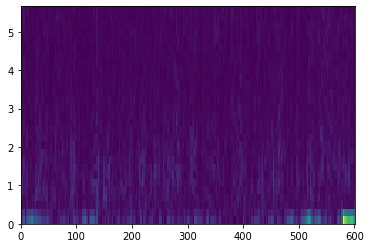

In [258]:
a = 0
for filename in folder_patient1:
    if "interictal" in filename:
        a += 1
        data = pd.read_csv(f'../SafeSeizure/data/Patient_1_csv/{filename}')
        for i in range (0,15):
            f, t, Zxx = signal.stft(data.iloc[i], fs=50, nperseg=256)
            Zxx_crop = Zxx[:30,]
            f_crop = f[:30]
            plt.pcolormesh(t, f_crop, np.abs(Zxx_crop))
            plt.savefig(f'/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/interictal_images/sensor{i}/img{a}{i}.png')       
    if "preictal" in filename:
        a += 1
        data = pd.read_csv(f'../SafeSeizure/data/Patient_1_csv/{filename}')
        for i in range (0,15):
            f, t, Zxx = signal.stft(data.iloc[i], fs=50, nperseg=256)
            Zxx_crop = Zxx[:30,]
            f_crop = f[:30]
            plt.pcolormesh(t, f_crop, np.abs(Zxx_crop))
            plt.savefig(f'/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/preictal_images/sensor{i}/img{a}{i}.png')       
        

<ipython-input-260-0bcbfb41aa2c>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f_crop, np.abs(Zxx_crop))
<ipython-input-260-0bcbfb41aa2c>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f_crop, np.abs(Zxx_crop))


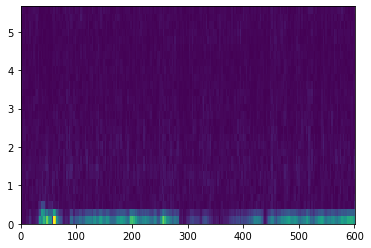

In [260]:
a = 0
b = "p2"
for filename in folder_patient2:
    if "interictal" in filename:
        a += 1
        data = pd.read_csv(f'../SafeSeizure/data/Patient_2_csv/{filename}')
        for i in range (0,15):
            f, t, Zxx = signal.stft(data.iloc[i], fs=50, nperseg=256)
            Zxx_crop = Zxx[:30,]
            f_crop = f[:30]
            plt.pcolormesh(t, f_crop, np.abs(Zxx_crop))
            plt.savefig(f'/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/interictal_images/sensor{i}/img{b}{a}{i}.png')       
    if "preictal" in filename:
        a += 1
        data = pd.read_csv(f'../SafeSeizure/data/Patient_1_csv/{filename}')
        for i in range (0,15):
            f, t, Zxx = signal.stft(data.iloc[i], fs=50, nperseg=256)
            Zxx_crop = Zxx[:30,]
            f_crop = f[:30]
            plt.pcolormesh(t, f_crop, np.abs(Zxx_crop))
            plt.savefig(f'/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/SafeSeizure/data/preictal_images/sensor{i}/img{b}{a}{i}.png') 